In [2]:
from IPython.display import display, Markdown, Latex
from decimal import Decimal
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import math as mt

# Solutions to Modern Data Science Problems (probelms till 13.11)
by *Mateusz Kmieć* 

# Statistics I (recap) 

### Probelm 1.1

Tossing two coins: Ω = { HT , TH , HH , TT }.
We define as a random variable which expresses number of heads X(E) = 1 if E = {HT, TH} 0 if E= {TT}, 2 if E = {HH}. What are CDF and PMF functions? Draw it. *


*Remark!* I believe that in case of dicrete distributions we should draw CMF instead of CDF?

,Ω,X(E)
0,HT,1
1,TH,1
2,HH,2
3,TT,0


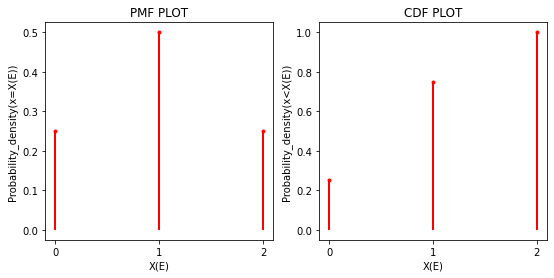

In [5]:
def PMF(Data):
    pmf=np.array([0,0,0])
    for i in range(len(Data)):
        if Data[i][1]=="0":
            pmf[0]=pmf[0]+1
        elif Data[i][1]=="1":
            pmf[1]=pmf[1]+1
        elif Data[i][1]=="2":
            pmf[2]=pmf[2]+1
    pmf=pmf/np.sum(pmf)
    return pmf

#Data that we are working on, defined
Data=np.array([["HT", 1],["TH",1],["HH",2],["TT",0]])
Data_display= pd.DataFrame(Data,columns=['\u03A9','X(E)'])
display(Data_display)


#PMF and X(E), defined
pmf=PMF(Data)
cdf=np.cumsum(pmf)
XE = np.arange(3)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(9, 4))
ax1.set_title("PMF PLOT")
ax1.set_xlabel("X(E)")
ax1.set_ylabel("Probability_density(x=X(E))")
ax1.set_xticks(np.arange(0, 2.1, step=1))
ax1.vlines(XE, 0, pmf, colors='r', linestyles='-', lw=2)
ax1.plot(XE, pmf, 'ro', ms=3, mec='r')

ax2.set_title("CDF PLOT")
ax2.set_xlabel("X(E)")
ax2.set_ylabel("Probability_density(x<X(E))")
ax2.set_xticks(np.arange(0, 2.1, step=1))
ax2.vlines(XE, 0, cdf, colors='r', linestyles='-', lw=2)
ax2.plot(XE, cdf, 'ro', ms=3, mec='r')
plt.show()

### Problem 1.2
What are the PDF and CDF functions for the uniform distribution defined for X =[0, a]? *

PDF of the uniform distribution is a normalised constant function.
In this case it is a constant function of value $\frac{1}{a}$.

CDF of the uniform distribution is the integral of PDF.
Therefore in this case it is a linear function $\frac{x}{a}$. 

I plotted both functions below. For conveniance I rescaled both axis for each plot multiplying the values from both axis by $\frac{1}{a}$.

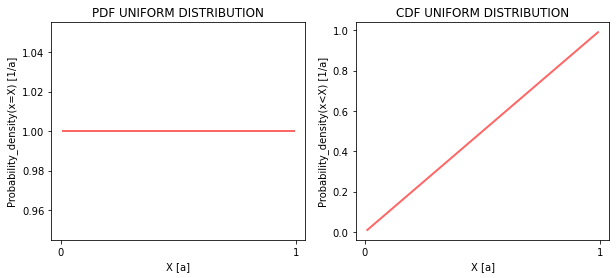

In [34]:
from scipy.stats import uniform
mean, var, skew, kurt = uniform.stats(moments='mvsk')

x = np.linspace(uniform.ppf(0.01), uniform.ppf(0.99), 100)


fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 4))
ax1.set_title("PDF UNIFORM DISTRIBUTION")
ax1.set_xlabel("X [a]")
ax1.set_ylabel("Probability_density(x=X) [1/a]")
ax1.set_xticks(np.arange(0, 2.1, step=1))
ax1.plot(x, uniform.pdf(x),'r-', lw=2, alpha=0.6, label='uniform pdf')

ax2.set_title("CDF UNIFORM DISTRIBUTION")
ax2.set_xlabel("X [a]")
ax2.set_ylabel("Probability_density(x<X) [1/a]")
ax2.set_xticks(np.arange(0, 2.1, step=1))
ax2.plot(x, uniform.cdf(x),'r-', lw=2, alpha=0.6, label='uniform cdf')
plt.show()

### Probelm 1.3
Write a program that simulates the tossing of two coins and estimate the CDF and PMF functions for the first problem above *

Again I believe there should be CMF instead of CDF!

Print the first 5 tosses: 
 [['HT' '1']
 ['TH' '1']
 ['HT' '1']
 ['TT' '0']
 ['TT' '0']]


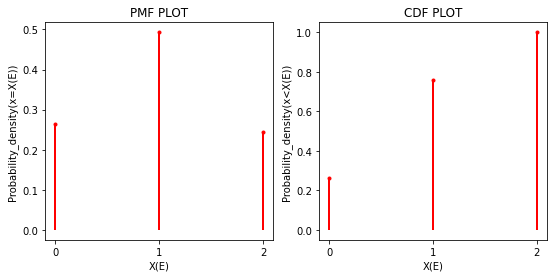

In [110]:
import random

def coin_tosser():
    outcome=np.random.choice(np.arange(0, 3), p=pmf)
    
    if outcome==2:
        out="HH"
    elif outcome==1:
        if random.randint(1, 2)==1:
            out="TH"
        else:
            out="HT"
    elif outcome==0:
        out="TT"
    return [out, outcome] 

#Alternatively we could write the above function in the following way:
#U=["HH","TH","HT","TT"]
#np.random.choice(U)
#But I wanted to use pdf from the previous problem (and so I had to supply weights pmf)
#Both methods should give similar results for large number of tosses.

#Toss coin 1000 times, write outcome to a list.
list_toss=[]
for i in range(1000):        
    list_toss.append(coin_tosser())

Data2=np.array(list_toss)

print("Print the first 5 tosses: \n",Data2[:5])



#PMF and X(E), defined
pmf2=PMF(Data2)
cdf2=np.cumsum(pmf2)
XE2 = np.arange(3)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(9, 4))
ax1.set_title("PMF PLOT")
ax1.set_xlabel("X(E)")
ax1.set_ylabel("Probability_density(x=X(E))")
ax1.set_xticks(np.arange(0, 2.1, step=1))
ax1.vlines(XE2, 0, pmf2, colors='r', linestyles='-', lw=2)
ax1.plot(XE2, pmf2, 'ro', ms=3, mec='r')

ax2.set_title("CDF PLOT")
ax2.set_xlabel("X(E)")
ax2.set_ylabel("Probability_density(x<X(E))")
ax2.set_xticks(np.arange(0, 2.1, step=1))
ax2.vlines(XE2, 0, cdf2, colors='r', linestyles='-', lw=2)
ax2.plot(XE2, cdf2, 'ro', ms=3, mec='r')
plt.show()

### Problem 1.4
(The same problem as last time - STRANGE!)

I copied my solution from the last time and pasted it here!

Let g(X) =1 for some set A being a subset of sample space Ω: What is E[g(X)] if X is discrete with a given PMF or continuous with a given PDF *

In order to solve this problem we have to make an assumption about the values of $g(x)$ for $x\notin A$. Since the author of this question did not specify what happens for x from within $\Omega$ but outside of $A$ region we have taken the liberty to specify function $g(x)$ in a little bit more detail.

$$g(x)= 
     \begin{cases}
      &1, x\in A\\
      &0, x\notin A
     \end{cases}.$$
     
For continuous $x \in A$:
$$E\left[g(X)\right]=\int_{\Omega}g(x)\cdot f_{x}(x) dx=\int_{\Omega} f_{x}(x) dx = 1,$$

where in accordance to the lecture $f_{x}(x)$ is PDF function.  

For discrete $k\in A$ and function $g(x)$ defined in the aforementioned way it is only natural to conclude that:

$$E\left[g(X)\right]=\int_{\Omega}g(x)\cdot f_{x}(x) \cdot \delta(x-k) dx=\sum_{k\in A}g(k)\cdot p_{x}(k)=\sum_{k\in A}p_{x}(k)=1,$$

where $p_{x}(k)$ is the PMF function.

The above equation can be trivially generalised to $n$ dimensions: $$x\rightarrow (x_{1},x_{2},.....,x_{n}),$$ $$dx\rightarrow dx_{1}dx_{2}...dx_{n}.$$

### Problem 1.5
Calculate the mean and the variance of the uniform distribution *

I assume $x \in [a,b]$.

PDF for uniform distribution
$$\text{pdf}(x)=\frac{1}{b-a}$$

Having calculated pdf(x) for uniform distribution we can procede with calculating mean (first momentum):

$$\mu=\frac{\int_{a}^{b} \text{pdf}(x)xdx}{\int_{a}^{b} \text{pdf}(x)}=\frac{b^{2}-a^{2}}{2(b-a)}=\frac{(a+b)}{2}.$$

Now we can calculate variance for this distribution:

$$\sigma^{2}=\left(\int_{a}^{b}x^{2}\text{pdf}(x)dx\right)-\mu^{2}.$$

The only probelm here is the calculation of the second momentum:
    
$$\int_{a}^{b}x^{2}\text{pdf}(x)dx=\frac{b^{3}-a^{3}}{3(b-a)}.$$

Now after subtracting $\mu^{2}$ we will end up with:

$$\sigma^{2}=\frac{b^{3}-a^{3}}{3(b-a)}-\frac{(a+b)^2}{4}.$$

Calculations:

$$\sigma^{2}=\frac{4b^{3}-4a^{3}-3b^{3}+3a^{3}+3a^{2}b-3ab^{2}}{12(b-a)}=\frac{(b-a)^{2}}{12(b-a)}=\frac{(b-a)^{2}}{12}.$$

Answer

$$\sigma^{2}=\frac{(b-a)^{2}}{12}.$$

### Problem 1.6
Implement a function that returns mean, where X is represented by a list of numbers *

In [38]:
X=[1,1,1,2,2,2]#expected mean 1.5

#brute force solution
def Mean_brute(X):
    y=0
    for x in X:
        y=y+x
    mean_brute = y/len(X)
    return mean_brute              

#numpy function
def Mean(X):
    return np.mean(X)                  

print("As expected the mean (brute force) of X is: {}.".format(Mean_brute(X)))
print("As expected the mean (numpy )of X is: {}.".format(Mean(X)))

As expected the mean (brute force) of X is: 1.5.
As expected the mean (numpy )of X is: 1.5.


### Problem 1.7
Implement a function that returns Var[X], where X is represented by a list of numbers *

In [107]:
X1=[1,1,1,1,1]                      #list of numbers test 1 expected result 0
X2=[1,0,1,0,1,0]                    #list of numbers test 2 expected result 0.25.

def Variation(X):
    XX=np.array(X)                  #array of numbers
    mean=np.mean(XX)                #array of means
    dist=np.dot(XX-mean,XX-mean)    #sum of (x-mu)^2
    var=dist/len(X)                 #variation = sqrt(sum of (x-mu^2))
    return var

print("Test 1: Variation for the list of numbers X1={}:   {}.".format(X1,Variation(X1)))
print("Test 2: Variation for the list of numbers X2={}:   {}.".format(X2,Variation(X2)))

Test 1: Variation for the list of numbers X1=[1, 1, 1, 1, 1]:   0.0.
Test 2: Variation for the list of numbers X2=[1, 0, 1, 0, 1, 0]:   0.25.


In [108]:
# test 1
XX1=np.array(X1)
print(np.var(XX1,axis=0))     #variation numpy 

# test 2
XX2=np.array(X2)
print(np.var(XX2,axis=0))     #variation numpy 

0.0
0.25


### Problem 1.8
Implement a function that returns Euclidean distance between two vectors represented as a list of numbers. *

In [15]:
X=[0,0,0]
Y=[1,0,0]

def Euclidean_distance(X,Y):
    xx=np.array(X)
    yy=np.array(Y)
    return np.sqrt(np.sum(np.square(xx-yy)))
print("Euclidean distance: ",Euclidean_distance(X,Y))

Euclidean distance:  1.0


### Problem 1.9
Implement a function that returns Manhattan distance between two vectors represented as a list of numbers. *

In [105]:
def Manhattan_distance(X,Y):
    xx=np.array(X)
    yy=np.array(Y)
    dist=np.abs(np.subtract(xx,yy))
    return np.sum(dist)

#test 1
from sklearn.metrics.pairwise import manhattan_distances

X=[[1,0,0],[0,0,0],[0,0,0]] 
Y=[[0,0,0],[0,0,0],[0,0,0]]
#I use 3d space, but we have the freedom to chose any number of dimensions
#The only requirement is that we should use the following list format [[],[],[],[]]

print("Manhattan distance test 1:\n {}.\n".format(manhattan_distances(X,Y)))

for i in range(len(X)):
    for j in range(len(Y)):
        print("Manhattan distance ({},{}): {}.".format(i,j,Manhattan_distance(X[i],Y[j])))
        
print("My function yields the same results as sklearn funciton!")

Manhattan distance test 1:
 [[1. 1. 1.]
 [0. 0. 0.]
 [0. 0. 0.]].

Manhattan distance (0,0): 1.
Manhattan distance (0,1): 1.
Manhattan distance (0,2): 1.
Manhattan distance (1,0): 0.
Manhattan distance (1,1): 0.
Manhattan distance (1,2): 0.
Manhattan distance (2,0): 0.
Manhattan distance (2,1): 0.
Manhattan distance (2,2): 0.
My function yields the same results as sklearn funciton!


# Statistics II (recap)

### Problem 2.1
Tossing a coin: Ω = { H, T } and rolling strange die Ω = { 1 , 2 , 3}. If H we roll the die twice if T we roll the die once. Calculate joint PMF. Calculate marginal PMF based on joint ones. Calculate joint and marginal CDF. Write a program that estimates the PMFs distributions.

In [331]:
print("Read joint PMF from the tables below. Sum index denotes the sum of dices.")
Dane=np.array([["",'0','1/18','2/18','3/18','2/18','1/18'],["",'1/6','1/6','1/6','0','0','0'],["",'1/6','2/9','5/18','3/18','2/18','1/18'],['','9/18','','','','',''],['','3/6','','','','','']])
 
Dane_display= pd.DataFrame(Dane,columns=['sum =','1','2','3','4','5','6'],index=['PMF(H,sum)','PMF(T,sum)','Mariginal PMF(H,sum)+PMF(T,sum)','Mariginal PMF(H)','Mariginal PMF(T)'])
display(Dane_display)

Read joint PMF from the tables below. Sum index denotes the sum of dices.


,sum =,1,2,3,4,5,6
"PMF(H,sum)",,0,1/18,2/18,3/18,2/18,1/18
"PMF(T,sum)",,1/6,1/6,1/6,0,0,0
"Mariginal PMF(H,sum)+PMF(T,sum)",,1/6,2/9,5/18,3/18,2/18,1/18
Mariginal PMF(H),,9/18,,,,,
Mariginal PMF(T),,3/6,,,,,


In [286]:
print("Read joint CMF from the tables below. Sum index denotes the sum of dices.")
Dane=np.array([["",'0','1/18','3/18','6/18','8/18','9/18'],["",'1/6','2/6','3/6','0','0','0'],["",'1/6','7/18','2/3','5/6','17/18','18/18']])
 
Dane_display= pd.DataFrame(Dane,columns=['sum =','1','2','3','4','5','6'],index=['CMF(T,sum)','CMF(H,sum)','Mariginal CMF(T,sum)+CMF(H,sum)'])
display(Dane_display)

Read joint CMF from the tables below. Sum index denotes the sum of dices.


,sum =,1,2,3,4,5,6
"CMF(T,sum)",,0,1/18,3/18,6/18,8/18,9/18
"CMF(H,sum)",,1/6,2/6,3/6,0,0,0
"Mariginal CMF(T,sum)+CMF(H,sum)",,1/6,7/18,2/3,5/6,17/18,18/18


In [328]:
# Write a program that estimates the PMFs distributions.
def PMF_2(Data):
    
    pmf_T=np.zeros(6)
    pmf_H=np.zeros(6)
    
    for i in range(len(Data)):
        if Data[i][0]==1:
            pmf_H[Data[i][1]-1]=pmf_H[Data[i][1]-1]+1
        else:
            pmf_T[Data[i][1]-1]=pmf_T[Data[i][1]-1]+1

    return [np.divide((pmf_H/np.sum(pmf_H)),2), np.divide((pmf_T/np.sum(pmf_T)),2)]

def roll(n):
    outcome=[]
    for i in range(n):
        outcome.append(np.random.choice(np.arange(1, 4)))
    return np.sum(np.array(outcome))

def toss_roll(m):
    result=[]
    for i in range(m):
        toss=np.random.choice(np.arange(1,3))
        if toss==1:#head
            out=toss
            die_result=roll(2)
        else:#tail 
            out=toss
            die_result=roll(1)
        result.append([out, die_result])
    return result
    
Data=toss_roll(10000)

PMF_H=PMF_2(Data)[0]
PMF_T=PMF_2(Data)[1]

CDF_H = np.cumsum(PMF_H)
CDF_T = np.cumsum(PMF_T)
summ  =  np.arange(0,6)

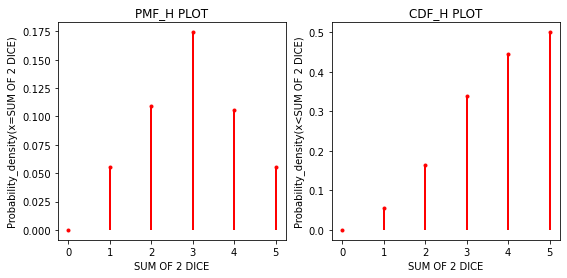

In [329]:
figH, (axH1, axH2) = plt.subplots(1, 2,figsize=(9, 4))
axH1.set_title("PMF_H PLOT")
axH1.set_xlabel("SUM OF 2 DICE")
axH1.set_ylabel("Probability_density(x=SUM OF 2 DICE)")
axH1.set_xticks(np.arange(0, 6.1, step=1))
axH1.vlines(summ, 0, PMF_H, colors='r', linestyles='-', lw=2)
axH1.plot(summ, PMF_H, 'ro', ms=3, mec='r')

axH2.set_title("CDF_H PLOT")
axH2.set_xlabel("SUM OF 2 DICE")
axH2.set_ylabel("Probability_density(x<SUM OF 2 DICE)")
axH2.set_xticks(np.arange(0, 6.1, step=1))
axH2.vlines(summ, 0, CDF_H, colors='r', linestyles='-', lw=2)
axH2.plot(summ, CDF_H, 'ro', ms=3, mec='r')
plt.show()

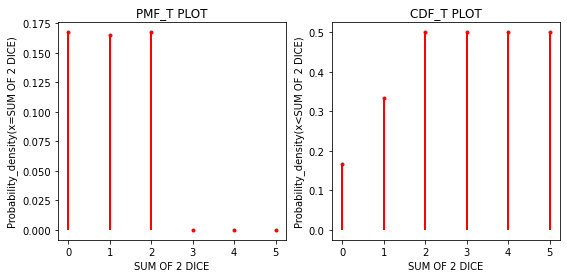

In [330]:
figT, (axT1, axT2) = plt.subplots(1, 2,figsize=(9, 4))
axT1.set_title("PMF_T PLOT")
axT1.set_xlabel("SUM OF 2 DICE")
axT1.set_ylabel("Probability_density(x=SUM OF 2 DICE)")
axT1.set_xticks(np.arange(0, 6.1, step=1))
axT1.vlines(summ, 0, PMF_T, colors='r', linestyles='-', lw=2)
axT1.plot(summ, PMF_T, 'ro', ms=3, mec='r')

axT2.set_title("CDF_T PLOT")
axT2.set_xlabel("SUM OF 2 DICE")
axT2.set_ylabel("Probability_density(x<SUM OF 2 DICE)")
axT2.set_xticks(np.arange(0, 6.1, step=1))
axT2.vlines(summ, 0, CDF_T, colors='r', linestyles='-', lw=2)
axT2.plot(summ, CDF_T, 'ro', ms=3, mec='r')
plt.show()

### Problem 2.2

Let X be uniform in (-1,1) and Y = X*X. Check if X and Y are correlated. Check if X and Y are independent.

Correlation is defined as:

$$\rho=\frac{\text{cov}(X,Y)}{\sigma_{X}\sigma_{Y}}.$$

The above equation can be expressed as:

$$\rho=\frac{E[(X-\mu_{X})]E[(Y-\mu_{Y})]}{\sigma_{X}\sigma_{Y}},$$

where $E[(X-\mu_{X})]=E[(X-\frac{1}{2})]=0$.
Let us notice that $\sigma_{X}$ is also 0.

Consequently, correlation is indeterminate $\rho=\frac{0}{0}$.
The question of solving this problem is one of solving this indetermination.

Internet sources that I've read (i.e. https://stats.stackexchange.com/questions/186745/how-to-find-correlation-between-two-functions) seem to suggest that in this case we have no correlation $\rho=0$.


X and Y are independent because (constant $\text{pdf}_{X}(x)=\frac{1}{2}$ can always be factored out during integration):

$$E[(XY)]=E[X]E[Y].$$

Having established that X,Y are independent we can confirm that in fact $\rho=0$ in this case. 


### Problem 2.3

Implement a function that returns Cov[X,Y]

In [101]:
X1=[1,0]       
Y1=[1,-1]      #test 1

X2=[1,3]       
Y2=[1,2]      #test 2


print("Covariance matrix for test 1\n", np.cov(np.array([X1,Y1])))
print("Covariance matrix for test 2\n", np.cov(np.array([X2,Y2])))

#I understood that I am supposed to return invariance between two vectors x,y and 
#not between all combinations of these vectors.
#If that is what the author of the excercise ment,
# he shall find comfort in the form that the above tests are written.

def Cov(X,Y):
    XX=np.array(X)                     #array of numbers
    YY=np.array(Y)                     #array of numbers
    meanX=np.mean(XX)                  #array of means X
    meanY=np.mean(YY)                  #array of means Y
    dist=np.sum((XX-meanX)*(YY-meanY)) #sum of (x-mu)^2
    cov=dist/(len(XX)-1)
    return cov

print("\ntest 1")
print("Covariance X1={}, X1={} amounts to: {}".format(X1,X1,Cov(X1,X1)))
print("Covariance X1={}, Y1={} amounts to: {}".format(X1,Y1,Cov(X1,Y1)))
print("Covariance Y1={}, X1={} amounts to: {}".format(Y1,X1,Cov(Y1,X1)))
print("Covariance Y1={}, Y1={} amounts to: {}".format(Y1,Y1,Cov(Y1,Y1)))

print("\ntest 2")
print("Covariance X2={}, X2={} amounts to: {}".format(X2,X2,Cov(X2,X2)))
print("Covariance X2={}, Y2={} amounts to: {}".format(X2,Y2,Cov(X2,Y2)))
print("Covariance Y2={}, X2={} amounts to: {}".format(Y2,X2,Cov(Y2,X2)))
print("Covariance Y2={}, Y2={} amounts to: {}".format(Y2,Y2,Cov(Y2,Y2)))

Covariance matrix for test 1
 [[0.5 1. ]
 [1.  2. ]]
Covariance matrix for test 2
 [[2.  1. ]
 [1.  0.5]]

test 1
Covariance X1=[1, 0], X1=[1, 0] amounts to: 0.5
Covariance X1=[1, 0], Y1=[1, -1] amounts to: 1.0
Covariance Y1=[1, -1], X1=[1, 0] amounts to: 1.0
Covariance Y1=[1, -1], Y1=[1, -1] amounts to: 2.0

test 2
Covariance X2=[1, 3], X2=[1, 3] amounts to: 2.0
Covariance X2=[1, 3], Y2=[1, 2] amounts to: 1.0
Covariance Y2=[1, 2], X2=[1, 3] amounts to: 1.0
Covariance Y2=[1, 2], Y2=[1, 2] amounts to: 0.5


### Problem 2.4

Implement a function that returns Cosine similarity

In [40]:
from scipy import spatial

#test 
X1 = [1,2,3,4]
Y1 = [2,4,2,5]
result = 1 - spatial.distance.cosine(X1, Y1)
print("Scipy based solution cosine similarity between two vecotrs: {}.".format(result))


#solution based on numpy
def Cos_sim(X,Y):
    cos_sim = np.dot(X,Y)/(np.norm(X)*np.norm(Y))
    return cos_sim
print("Numpy based solution cosine similarity between two vecotrs: {}.".format(result))

Scipy based solution cosine similarity between two vecotrs: 0.938952955723142.
Numpy based solution cosine similarity between two vecotrs: 0.938952955723142.


### Problem 2.5

Implement a function that returns Pearson correlation coefficient

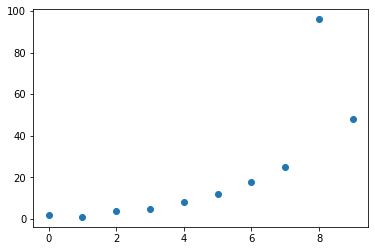

Test 1 pearson correlation coefficient matrix

 [[1.         0.75864029]
 [0.75864029 1.        ]]

Pearson correlation coefficients obtained using my function

Pearson correlation coefficient (X,X): 1.
Pearson correlation coefficient (X,Y): 0.75864029.
Pearson correlation coefficient (Y,X): 0.75864029.
Pearson correlation coefficient (Y,Y): 1.
My function yields the same results as sklearn funciton!


In [93]:
#test 1
X = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Y = [2, 1, 4, 5, 8, 12, 18, 25, 96, 48]

plt.scatter(X,Y)
plt.show()

r = np.corrcoef(np.array(X), np.array(Y))

print("Test 1 pearson correlation coefficient matrix\n\n",r)

#Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))

def pearson(X,Y):
    pearson=Cov(X,Y)/(np.std(np.array(X))*np.std(np.array(Y)))
    return pearson
    
print("\nPearson correlation coefficients obtained using my function\n")

print("Pearson correlation coefficient ({},{}): {:.8g}.".format("X","X",pearson(X,X)))
print("Pearson correlation coefficient ({},{}): {:.8g}.".format("X","Y",pearson(X,Y)))
print("Pearson correlation coefficient ({},{}): {:.8g}.".format("Y","X", pearson(Y,X)))
print("Pearson correlation coefficient ({},{}): {:.8g}.".format("Y","Y",pearson(Y,Y)))
        
print("My function yields the same results as sklearn funciton!")